In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it

sns.set_theme()

# Generate Date

In [1]:
# Use command line to run simulations.
inputs = '--mut 5e-05 --poptype F --s 0.24  --runs 10 --sampling_method dirichlet --k 0.1'
!python3 plateau_crossing.py $inputs --K 1
!python3 plateau_crossing.py $inputs --k 2
!python3 plateau_crossing.py $inputs --k 3

Finished data/K1FM5E-05DMk0.1! Used time: 0.039936065673828125s
Finished data/K3FM5E-05DMk2.0! Used time: 0.12842917442321777s
Finished data/K3FM5E-05DMk3.0! Used time: 0.11786580085754395s


# Plots

## Trajetories

This plotting method is the same as in the py file.

In [24]:
k = 2
filename = "FM5E-05DM"
path = 'data/K'
lineage_num = pd.read_csv(path + str(k) + filename + ".out", sep=",")

<AxesSubplot:xlabel='t'>

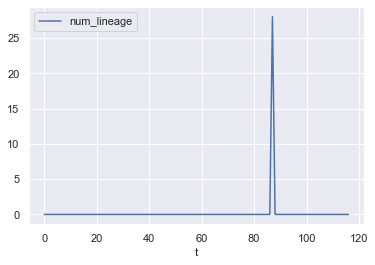

In [25]:
data=lineage_num[lineage_num.run == 8]
data.plot(x="t", y="num_lineage")

In [19]:
# Import data
k = 3
filename = "FM5E-05DM"
path = 'data/R0.38K0.1/K'
genotype_trajs = pd.read_csv(path + str(k) + filename + ".traj", sep=",")
lineage_trajs = pd.read_csv(path + str(k) + filename + ".lineage", sep=",")
voc_t = pd.read_csv(path + str(k) + filename + ".voc", sep=",")
voc_t = voc_t.replace(np.nan, -1, regex=True)
# genotype names
genotypes = np.asarray(list(it.product((-1, 1), repeat=k)))
genotypes = genotypes[np.argsort(genotypes.sum(axis=1))]


### Lineages Trajectories

In [147]:
def traj_plot(run_index, plot_type):
    '''
    Plot trajectories of all genotypes and lineages.
    '''
    traj_run = genotype_trajs[genotype_trajs.run == run_index]
    # plot trajectories of genotypes
    fig = plt.figure()
    ax = fig.add_subplot(111)
    t = traj_run.t
    for index, col in traj_run.iloc[:,2:].iteritems():
        ax.plot(t, col)

        
    lineages_to_plot = lineage_trajs[(lineage_trajs.voc == True) & (lineage_trajs.run == run_index)]
    for index, row in lineages_to_plot.iloc[:,2:].iterrows():
        t0 = row[0]
        lineage = row[1:]
        t = np.arange(len(lineage)) + t0
        ax.plot(t, lineage)

    if plot_type != 'genotype':
        lineage_plot(ax, run_index, plot_type)

    # legend for genotypes (without full mutant)
    legend = []
    for genotype in genotypes:
        genotype = np.where(genotype == -1, 0, genotype)
        legend.append("".join(str(i) for i in genotype))
    ax.legend(legend, loc=0)

    plt.yscale("log", base=10)
    ymax = traj_run.max().max()
    plt.ylim([1, 2.5*ymax])
    plt.yscale("log", base=10)
    plt.xlabel("T")
    plt.ylabel("Cases")
    plt.show()

def lineage_plot(ax, run_index, plot_type):
    '''
    Plot trajectories of lineages or vocs.
    '''
    # select row to plot
    if plot_type == 'voc':
        lineages_to_plot = lineage_trajs[(lineage_trajs.voc == True) & (
            lineage_trajs.run == run_index)]
    if plot_type == 'lineage':
        lineages_to_plot = lineage_trajs[lineage_trajs.run == run_index]
    # quit when no lineage to plot
    if lineages_to_plot.shape[0] == 0:
        return
    # plot each row
    for index, row in lineages_to_plot.iloc[:, 2:].iterrows():
        t0 = row[0]
        lineage = row[1:]
        t = np.arange(len(lineage)) + t0
        ax.plot(t, lineage)
    # voc time
    if voc_t.shape[0] == 0:
        return
    voc_text = voc_t.to_numpy()[run_index, 1:]
    voc_text = voc_text[voc_text != -1]
    voc_text = "VOC time: " + ",".join(str(int(i)) for i in voc_text)
    ymax = genotype_trajs.max()[2]
    plt.text(0, 1.1*ymax, voc_text, fontsize='large')


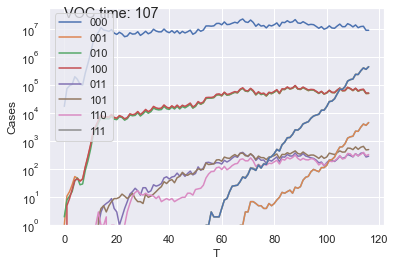

In [156]:
# plot_type can be 'lineage', 'voc' or 'genotypes'
plot_type = 'lineage' 
# index of runs
run_index = 15

traj_plot(run_index, plot_type)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(dataK3.sort_values(by = ['deltaT']))

## T- $\Delta$ T

In [2]:
filename = 'FM5E-05DMk0.1'
path = 'data/K'
# delta T between l2 and l1
l2 = 2
l1 = 1

for i in range(1,4):
    # read file; first 5 vocs
    temp = pd.read_csv(path + str(i) + filename + ".voc", sep=",", engine='python').iloc[:,:5]
    # add k col
    temp['K'] = i
    # add delta whics is l2 - l1
    temp['deltaT'] = temp['t' + str(l2)] - temp['t' + str(l1)]
    locals()['dataK%s' % i] = temp

TdeltaT = pd.concat([dataK1,dataK2,dataK3], ignore_index=True)
oberserTdeltaT = [50,10]

NameError: name 'pd' is not defined

In [36]:
dataK1.describe()

,run,t1,t2,t3,t4,K,deltaT
count,1000.000000,1000.000000,990.000000,982.000000,981.000000,1000.0,990.000000
mean,499.500000,19.930000,22.618182,23.079430,23.134557,1.0,2.642424
std,288.819436,11.414789,12.411860,12.578715,12.566080,0.0,5.653226
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000
25%,249.750000,13.000000,14.000000,14.000000,14.000000,1.0,0.000000
50%,499.500000,17.000000,19.000000,19.000000,19.000000,1.0,0.000000
75%,749.250000,25.000000,28.000000,29.000000,29.000000,1.0,2.000000
max,999.000000,82.000000,82.000000,82.000000,82.000000,1.0,34.000000


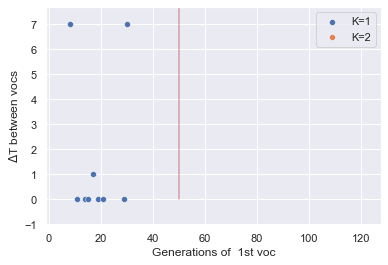

In [30]:
opacity = 400

for i in range(1,4):
    kData = TdeltaT[TdeltaT.K == i]
    # alpha = opacity/len(kData.index)
    if i == 1:
        graph = sns.scatterplot(data=kData, x="t1", y="deltaT")
    else:
        sns.scatterplot(data=kData, x="t1", y="deltaT", ax = graph)

plt.legend(["K=1", "K=2", "K=3"], loc=0)
plt.plot([oberserTdeltaT[0],oberserTdeltaT[0]], [0,2*max(TdeltaT.t1)], 'r', alpha = 0.5) # Vertical
plt.plot([0,2*max(TdeltaT.t1)], [oberserTdeltaT[1],oberserTdeltaT[1]], 'r', alpha = 0.5) # Horizontal
plt.xlabel('Generations of  1st voc')
plt.ylabel('$\Delta$T between vocs')
plt.xlim(-1,1.1*max(TdeltaT.t1));
plt.ylim(-1,1.1*max(TdeltaT.deltaT));